In [ ]:
from scipy.stats import norm, binom
import numpy as np
import matplotlib.pyplot as plt

# Relembrando

Temos uma população em que uma fração f vota em A e 1-f em B. Quando entrevistados com 3 perguntas com respostas quantitativas, os eleitores de A respondem cada uma com distribuição normal de média 0 e os de B com média 1, ambas distribuições com mesmo desvio padrão.  

    X, Y, Z: respostas da primeira, segunda e terceira pergunta, respectivamente

    C = X + Y + Z

# Projeto 2 - Teste de Hipótese

O que assumiremos da população é que é gerada pela soma de duas normais, com média 0 e 1, de mesmo desvio padrão sigma, que representam, respectivamente f e 1-f fração da população, com f desconhecido e sigma conhecido, e que temos uma amostra de tamanho n.

In [126]:
def gerar_amostra(f, sigma, n):
  C = []
  for i in range(n):
    media = np.random.binomial(1, 1-f)
    x = np.random.normal(media, scale=sigma)
    y = np.random.normal(media, scale=sigma)
    z = np.random.normal(media, scale=sigma)
    c = x+y+z
    C.append(c)
  return C

In [ ]:
def grafico_amostra(C):
  k = np.linspace(min(C), max(C), 100)
  plt.hist(C, bins=k, label='C')
  plt.ylabel("número de pessoas")
  plt.xlabel("soma das respostas")

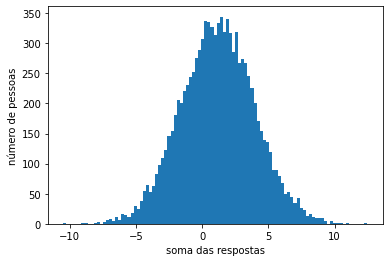

In [ ]:
C = gerar_amostra(0.6, 1.5, 10000)
grafico_amostra(C)

Faremos um teste de hipótese sobre o parâmetro f, ou seja, a proporção da população que vota em A, utilizando como variável aleatória a quantidade de eleitores cuja soma das respostas (c) é menor que 1.5. Definimos:

    N: quantidade de eleitores cuja soma das respostas é inferior a 1.5

$H0: f = f0$

$Ha: f < f0$

Assumimos a hipótese nula ($f=f0$) e desejamos modelar a distribuição de N. Temos:

    N ~ Binomial(n, P(C < 1.5))

onde n é o número de entrevistados.

Desejamos então conhecer a função de densidade acumulada de C, visto que P(C < 1.5) = Fc(1.5). Temos que a distribuição de C, apenas para os eleitores de A, é

    Ca ~ Normal(0, σ²) + Normal(0, σ²) + Normal(0, σ²) = Normal(0, 3σ²)

E apenas para os eleitores de B é

    Cb ~ Normal(1, σ²) + Normal(1, σ²) + Normal(1, σ²) = Normal(3, 3σ²)

Logo 

    C ~ f*Ca + (1-f)*Cb
    Fc(c) = f*Fca(c) + (1-f)*Fcb(c)

Tendo como hipótese $f = f0$,

    Fc(c) = f0*Fca(c) + (1-f0)*Fcb(c)

In [ ]:
def Fc(quantil, f0, sigma):
  Fca = norm.cdf(quantil, 0, scale=np.sqrt(3)*sigma)
  Fcb = norm.cdf(quantil, 3, scale=np.sqrt(3)*sigma)
  return f0*Fca + (1-f0)*Fcb 

Com a modelagem pronta, vamos calcular a estatística do teste (quantidade de eleitores na amostra cujas respostas somam menos de 1.5).

In [ ]:
def estatistica(C):
  z = 0
  for c in C:
    if(c < 1.5): z += 1

  return z



---



# Teste 1

$H0: f = f0$

$Ha: f < f0$

In [128]:
f0 = 0.5

f = 0.48
sigma = 1
n = 100_000

alpha = 0.05

C = gerar_amostra(f, sigma, n)
# grafico_amostra(C)

z = estatistica(C)
print("Estatística do teste: ", z)

p_valor = binom.cdf(z, n, p=Fc(1.5, f0, sigma))
print("P-valor: ", p_valor)

if(p_valor > alpha): print("Não rejeitamos H0.")
else: print("Rejeitamos H0.")

Estatística do teste:  50
P-valor:  0.5397946186935892
Não rejeitamos H0.


# Teste 2

$H0: f = f0$

$Ha: f > f0$

In [113]:
f0 = 0.5
f = 0.51
sigma = 1
n = 10_000
alpha = 0.08

C = gerar_amostra(f, sigma, n)
# grafico_amostra(C)

z = estatistica(C)
print("Estatística do teste: ", z)

p_valor = 1-binom.cdf(z, n, p=Fc(1.5, f0, sigma))
print("P-valor: ", p_valor)

if(p_valor > alpha): print("Não rejeitamos H0.")
else: print("Rejeitamos H0.")

Estatística do teste:  5099
P-valor:  0.023292763852473586
Rejeitamos H0.


# Teste 3

$H0: f = f0$

$Ha: f \neq f0$

In [125]:
f0 = 0.44
f = 0.441
sigma = 1
n = 1_000_000
alpha = 0.1

C = gerar_amostra(f, sigma, n)
# grafico_amostra(C)

z = estatistica(C)
print("Estatística do teste: ", z)

acumulada = binom.cdf(z, n, p=Fc(1.5, f0, sigma))
if(acumulada<0.5): 
  p_valor = 2*acumulada
else: 
  p_valor = 2*(1-acumulada)
print("P-valor: ", p_valor)

if(p_valor > alpha): print("Não rejeitamos H0.")
else: print("Rejeitamos H0.")

Estatística do teste:  439
P-valor:  0.13273213470424583
Não rejeitamos H0.
